In [1]:
from edc import check_compatibility
check_compatibility("user-2023.07-01", dependencies=[])

## Access CCI data with xcube
 

This notebook provides a walk-through demonstrating how to use xcube and the xcube store for the [Open Data Portal](https://climate.esa.int/en/odp/#/dashboard) of the [ESA Climate Change Initiative](https://climate.esa.int/en/esa-climate/esa-cci/) (CCI) to read and explore CCI data. 

In [2]:
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
import shapely.geometry
from IPython.display import JSON
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = 16,8

xcube store are self-descritptive and may be queried for detailed information, e.g., which data store parameters are available for `cciodp`? (We'll take a look at the `ccizarr` data store later.)

In [3]:
get_data_store_params_schema('cciodp')

Instantiate a new cci store: 

In [4]:
store = new_data_store('cciodp')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

The store can be queried for a specific dataset: 

In [5]:
store.has_data('esacci.OC.5-days.L3S.CHLOR_A.multi-sensor.multi-platform.MERGED.3-1.geographic')

True

In many cases, however, a search for specific crieteria will precede a query. How can this be done?

In [6]:
store.get_search_params_schema()

In this example, a multi-sensor sea surface temperature data (SST) with a daily frequency is searched for. The search results in three items. 

In [7]:
iterator = store.search_data(cci_attrs=dict(ecv='SST', sensor='multi-sensor', frequency='day'))
JSON([item.to_dict() for item in iterator])

<IPython.core.display.JSON object>

Which parameters must be passsed or are available to open a specific dataset? 

In [8]:
store.get_open_data_params_schema('esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.1-1.r1')

This query selects one variable form a specific dataset and subsets it in time. Note that the data is loaded lazily, which ensures a fast view into the dataset, even if large. In turn, however, the data transfer may slow down large-scale processing. Depending on the application, separating data transfer and processing may be advisable.    

In [9]:
dataset = store.open_data('esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.1-1.r1', 
                          variable_names=['analysed_sst'],
                          time_range=['2000-01-01','2010-12-31'])

dataset

<xarray.Dataset>
Dimensions:       (time: 4018, lat: 3600, lon: 7200, bnds: 2)
Coordinates:
  * lat           (lat) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
    lat_bnds      (lat, bnds) float32 dask.array<chunksize=(3600, 2), meta=np.ndarray>
  * lon           (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
    lon_bnds      (lon, bnds) float32 dask.array<chunksize=(7200, 2), meta=np.ndarray>
  * time          (time) datetime64[ns] 2000-01-01T12:00:00 ... 2010-12-31T12...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(4018, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    analysed_sst  (time, lat, lon) float32 dask.array<chunksize=(1, 900, 1800), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.SST.day.L4.SSTdepth.multi-sensor.multi-pl...
    date_created:            2023-07-31T10:06:34.322142
    processing_level:        L4
    time_coverage_start:     2000-01-01T00:00:00
    time_coverage_end:       2011-01-01T00:00:00
    time_coverage_duration:  P4018DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

Plot one time stamp of the dataset for a analysed_sst in order to take a brief look at the dataset:  

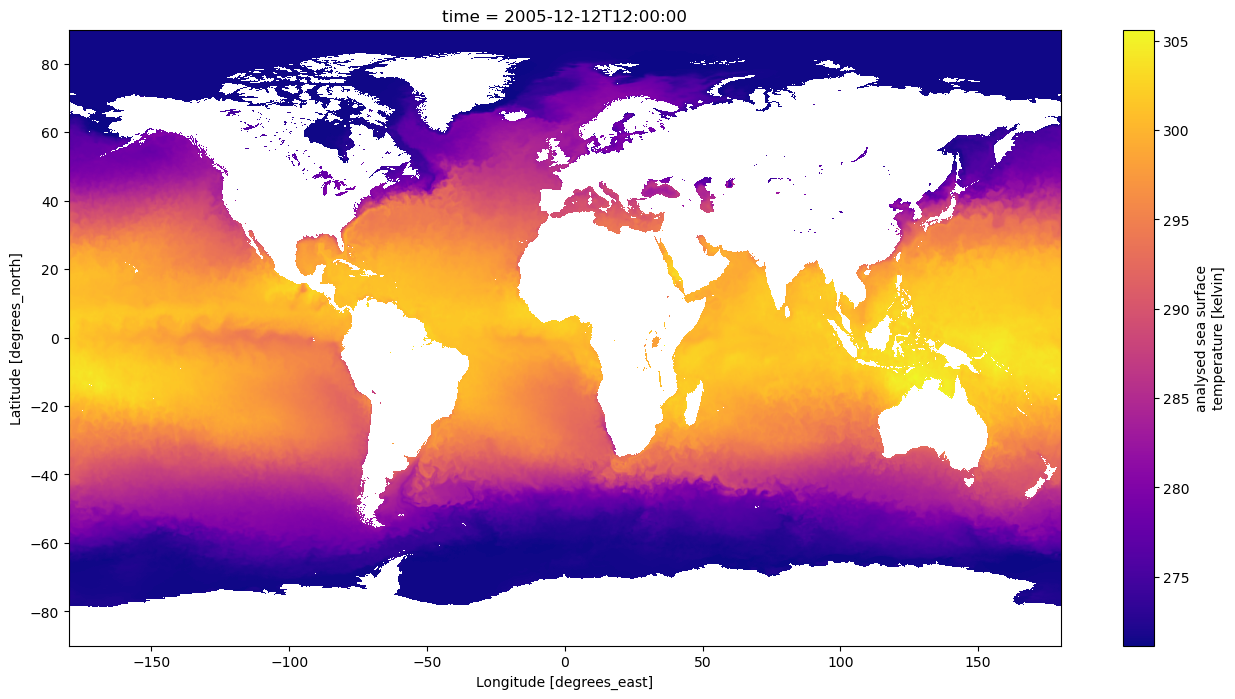

In [10]:
dataset.analysed_sst.sel(time='2005-12-12', method='nearest').plot.imshow(cmap='plasma')

In [11]:
dataset_ts = store.open_data('esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.1-1.r1', 
                          variable_names=['analysed_sst'], bbox=[-50, 20.,-49.95,20.05],
                          time_range=['2000-01-01','2000-12-31'])

In [12]:
dataset_ts

<xarray.Dataset>
Dimensions:       (time: 366, lat: 1, lon: 1, bnds: 2)
Coordinates:
  * lat           (lat) float32 20.02
    lat_bnds      (lat, bnds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
  * lon           (lon) float32 -49.97
    lon_bnds      (lon, bnds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
  * time          (time) datetime64[ns] 2000-01-01T12:00:00 ... 2000-12-31T12...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    analysed_sst  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.SST.day.L4.SSTdepth.multi-sensor.multi-pl...
    date_created:            2023-07-31T10:06:55.235691
    processing_level:        L4
    time_coverage_start:     2000-01-01T00:00:00
    time_coverage_end:       2001-01-01T00:00:00
    time_coverage_duration:  P366DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

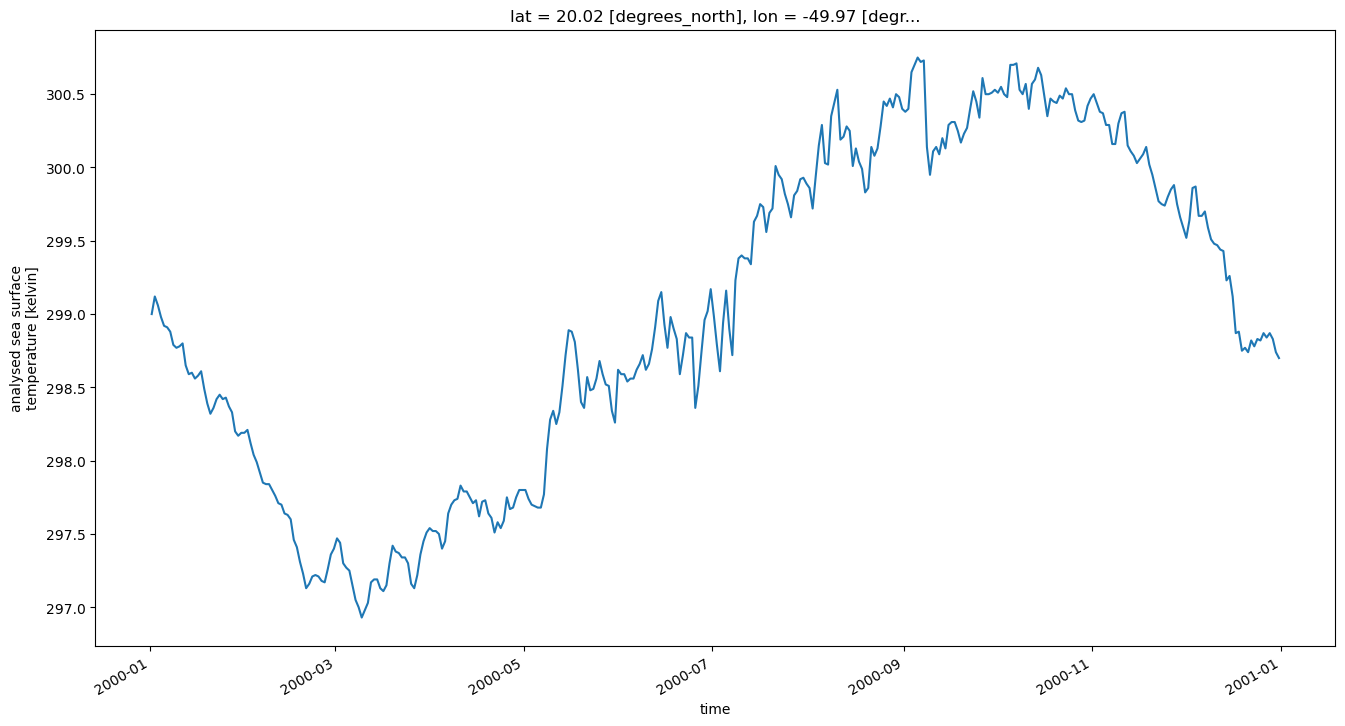

In [13]:
dataset_ts.analysed_sst.plot()